In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk import pos_tag

In [2]:
import csv

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nancy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import os

In [5]:
os.getcwd( )

'C:\\Users\\Nancy'

In [6]:
os.chdir(r'C:\Users\Nancy\Downloads')

In [7]:
os.getcwd( )

'C:\\Users\\Nancy\\Downloads'

In [2]:
tweets = pd.read_excel(r'C:\Users\ASUS\Desktop\data.world Export CoronaVirus Automated Accounts by KUNGFU.AI.xlsx')

In [3]:
tweets

,Rank,Influence \nScore,Date of Max \nInfluence,Tweet
0,1,31.0,2020-02-04,@NPR: One doctor in Hong Kong says he unde...
1,2,31.0,2020-02-04,@NPR: One doctor in Hong Kong says he unde...
2,3,31.0,2020-02-04,@ABCWorldNews: Hundreds of Hong Kong hospita...
3,4,31.0,2020-02-04,@ABCWorldNews: Hundreds of Hong Kong hospita...
4,5,31.0,2020-02-04,@Independent: Hong Kong hospital workers str...
...,...,...,...,...
761,762,NaN,NaT,NaN
762,763,NaN,NaT,NaN
763,764,NaN,NaT,NaN
764,765,NaN,NaT,NaN


In [5]:
tweet_result1 = tweets.dropna()

In [6]:
tweet_result1

,Rank,Influence \nScore,Date of Max \nInfluence,Tweet
0,1,31.0,2020-02-04,@NPR: One doctor in Hong Kong says he unde...
1,2,31.0,2020-02-04,@NPR: One doctor in Hong Kong says he unde...
2,3,31.0,2020-02-04,@ABCWorldNews: Hundreds of Hong Kong hospita...
3,4,31.0,2020-02-04,@ABCWorldNews: Hundreds of Hong Kong hospita...
4,5,31.0,2020-02-04,@Independent: Hong Kong hospital workers str...
...,...,...,...,...
221,222,6.0,2020-02-09,@NomenChanX: @ReutersWorld Amazon se retira ...
222,223,6.0,2020-02-10,@raythemouse: Does this image show scale of ...
223,224,6.0,2020-02-09,@ReutersBiz: Amazon withdraws from Barcelona...
224,225,6.0,2020-02-13,@siva217: Watch @AgendaFreeTV's broadcast: C...


In [7]:
tweet_text = tweet_result1['Tweet']

In [8]:
tweet_text

0          @NPR: One doctor in Hong Kong says he unde...
1          @NPR: One doctor in Hong Kong says he unde...
2        @ABCWorldNews: Hundreds of Hong Kong hospita...
3        @ABCWorldNews: Hundreds of Hong Kong hospita...
4        @Independent: Hong Kong hospital workers str...
                             ...                        
221      @NomenChanX: @ReutersWorld Amazon se retira ...
222      @raythemouse: Does this image show scale of ...
223      @ReutersBiz: Amazon withdraws from Barcelona...
224      @siva217: Watch @AgendaFreeTV's broadcast: C...
225      @willian18410696: @NicolasMaduro @ConCiliaFl...
Name: Tweet, Length: 226, dtype: object

In [9]:
tweet_text.sum()

"    @NPR: One doctor in Hong Kong says he understands why health care workers are protesting as coronavirus has spread from China:       We don      @NPR: One doctor in Hong Kong says he understands why health care workers are protesting as coronavirus has spread from China:       We don    @ABCWorldNews: Hundreds of Hong Kong hospital workers went on strike, demanding the government shutter all borders with mainland China a  @ABCWorldNews: Hundreds of Hong Kong hospital workers went on strike, demanding the government shutter all borders with mainland China a  @Independent: Hong Kong hospital workers strike for a second day to demand closure of China border amid coronavirus crisis https://t.co/  @QuickTake: @business @immigrationPH @MarisePayne These countries are evacuating their citizens from Hubei province, the epicenter of thUp to 50,000 pets have been left in Wuhan homes at the centre of China's deadly #coronavirus outbreak https://t.co/50Gqm77Axz  @demosisto: Foreign Ministry s

In [10]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(tweet_text.sum().lower())
print(tokens)

['npr', 'one', 'doctor', 'in', 'hong', 'kong', 'says', 'he', 'understands', 'why', 'health', 'care', 'workers', 'are', 'protesting', 'as', 'coronavirus', 'has', 'spread', 'from', 'china', 'we', 'don', 'npr', 'one', 'doctor', 'in', 'hong', 'kong', 'says', 'he', 'understands', 'why', 'health', 'care', 'workers', 'are', 'protesting', 'as', 'coronavirus', 'has', 'spread', 'from', 'china', 'we', 'don', 'abcworldnews', 'hundreds', 'of', 'hong', 'kong', 'hospital', 'workers', 'went', 'on', 'strike', 'demanding', 'the', 'government', 'shutter', 'all', 'borders', 'with', 'mainland', 'china', 'a', 'abcworldnews', 'hundreds', 'of', 'hong', 'kong', 'hospital', 'workers', 'went', 'on', 'strike', 'demanding', 'the', 'government', 'shutter', 'all', 'borders', 'with', 'mainland', 'china', 'a', 'independent', 'hong', 'kong', 'hospital', 'workers', 'strike', 'for', 'a', 'second', 'day', 'to', 'demand', 'closure', 'of', 'china', 'border', 'amid', 'coronavirus', 'crisis', 'https', 't', 'co', 'quicktake', 

In [11]:
# extract and display some sentences and phrases...
sentences = nltk.sent_tokenize(tweet_text.sum())

for s in sentences: print(s)

    @NPR: One doctor in Hong Kong says he understands why health care workers are protesting as coronavirus has spread from China:       We don      @NPR: One doctor in Hong Kong says he understands why health care workers are protesting as coronavirus has spread from China:       We don    @ABCWorldNews: Hundreds of Hong Kong hospital workers went on strike, demanding the government shutter all borders with mainland China a  @ABCWorldNews: Hundreds of Hong Kong hospital workers went on strike, demanding the government shutter all borders with mainland China a  @Independent: Hong Kong hospital workers strike for a second day to demand closure of China border amid coronavirus crisis https://t.co/  @QuickTake: @business @immigrationPH @MarisePayne These countries are evacuating their citizens from Hubei province, the epicenter of thUp to 50,000 pets have been left in Wuhan homes at the centre of China's deadly #coronavirus outbreak https://t.co/50Gqm77Axz  @demosisto: Foreign Ministry sp

In [12]:
for s in sentences:
    if "COVID19" in s:
        print(s)

Outside of China: 13.6% #coronavirus #COVID19 #Wuhan #Epidemic #Breaking  @DHSCgovuk: Four fu her patients in England have tested positive for #coronavirus, bringing the total number of cases in the UK to eigh  @EmbaixadaChina: 1/3 | Ontem em conversa com @lhmandetta e @ernestofaraujo sobre o combate da comunidade internacional ao coronavrus, @  @g_nishiyama:  # https://t.co/Kr8C7TyX8F  @hontounokotoga1: Coronavirus9 virus9 Journal of Ho  @IWF: Chinas mishandling of the coronavirus is now provoking questions abroad about the competence of its rulers and the reliability of  @MailOnline: 2,400 medical workers go on strike in Hong Kong to demand the government shuts its border with China to stop #coronavirus h    @ZonaEducApure: #Hoy || Estudiantes de EP Avelina Dua e, reciben charla alusiva al     Coronavirus     impa ida por la enfermera de CECOPRO    @business: Here's the latest on coronavirus: -China death toll at 1,016 with 42,000 confirmed cases -Hubei province removes top health o 

In [38]:
for s in sentences:
    if "coronavirus" in s:
        print(s)

    @NPR: One doctor in Hong Kong says he understands why health care workers are protesting as coronavirus has spread from China:       We don      @NPR: One doctor in Hong Kong says he understands why health care workers are protesting as coronavirus has spread from China:       We don    @ABCWorldNews: Hundreds of Hong Kong hospital workers went on strike, demanding the government shutter all borders with mainland China a  @ABCWorldNews: Hundreds of Hong Kong hospital workers went on strike, demanding the government shutter all borders with mainland China a  @Independent: Hong Kong hospital workers strike for a second day to demand closure of China border amid coronavirus crisis https://t.co/  @QuickTake: @business @immigrationPH @MarisePayne These countries are evacuating their citizens from Hubei province, the epicenter of thUp to 50,000 pets have been left in Wuhan homes at the centre of China's deadly #coronavirus outbreak https://t.co/50Gqm77Axz  @demosisto: Foreign Ministry sp

In [39]:
for s in sentences:
    if "death toll" in s:
        print(s)

This is just the confirmed death toll.
The Caijing a icle g  @BloombergAsia: Here's the latest on coronavirus: -Death toll past 560 in China -Mainland now has over 28,000 cases -Japanese PM Abe say  @business: Here's the latest on coronavirus: -China death toll at 1,016 with 42,000 confirmed cases -Hubei province removes top health o  @CBSNews: Chinese doctor was warned to keep quiet after sounding the alarm on coronavirus https://t.co/mYB9ZQbVwf https://t.co/8geumJeUiF  @DarrenPlymouth: Nothing says 21st century Plague like welding people into their homes.
Wuhan doctor's conversation leaked: Emergency ward becomes mo uary, nobody handles https://t.co/FJiObZNVNH@TheEconomist The latest coronavirus cases as of today:  source: WHO, CDC cha : https://t.co/4IGC9GzgEG https://t.co/cXFiCoJuCv  @AFP: @WHO #UPDATE The death toll from the novel #coronavirus outbreak surged past 1,000 in China on Tuesday as the head of the World He  @AmandadeCuba1: @DeZurdaTeam @DiazCanelB @ma i160patria @SecUJC

In [40]:
sentences[0]

"    @NPR: One doctor in Hong Kong says he understands why health care workers are protesting as coronavirus has spread from China:       We don      @NPR: One doctor in Hong Kong says he understands why health care workers are protesting as coronavirus has spread from China:       We don    @ABCWorldNews: Hundreds of Hong Kong hospital workers went on strike, demanding the government shutter all borders with mainland China a  @ABCWorldNews: Hundreds of Hong Kong hospital workers went on strike, demanding the government shutter all borders with mainland China a  @Independent: Hong Kong hospital workers strike for a second day to demand closure of China border amid coronavirus crisis https://t.co/  @QuickTake: @business @immigrationPH @MarisePayne These countries are evacuating their citizens from Hubei province, the epicenter of thUp to 50,000 pets have been left in Wuhan homes at the centre of China's deadly #coronavirus outbreak https://t.co/50Gqm77Axz  @demosisto: Foreign Ministry s

In [41]:
sentences[1]

'But #Xi  @Independent: Hong Kong hospital workers strike for a second day to demand closure of China border amid coronavirus crisis https://t.co/  @ABCWorldNews: Hundreds of Hong Kong hospital workers went on strike, demanding the government shutter all borders with mainland China a  @AFP: Hong Kong medical workers strike, demanding the city close its border with China to reduce the #coronavirus spreading   https://t.'

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# recreate token list without stopwords
from nltk.corpus import stopwords
tokens = [token for token in tokens if token not in stopwords.words('english')]
print(tokens)

['npr', 'one', 'doctor', 'hong', 'kong', 'says', 'understands', 'health', 'care', 'workers', 'protesting', 'coronavirus', 'spread', 'china', 'npr', 'one', 'doctor', 'hong', 'kong', 'says', 'understands', 'health', 'care', 'workers', 'protesting', 'coronavirus', 'spread', 'china', 'abcworldnews', 'hundreds', 'hong', 'kong', 'hospital', 'workers', 'went', 'strike', 'demanding', 'government', 'shutter', 'borders', 'mainland', 'china', 'abcworldnews', 'hundreds', 'hong', 'kong', 'hospital', 'workers', 'went', 'strike', 'demanding', 'government', 'shutter', 'borders', 'mainland', 'china', 'independent', 'hong', 'kong', 'hospital', 'workers', 'strike', 'second', 'day', 'demand', 'closure', 'china', 'border', 'amid', 'coronavirus', 'crisis', 'https', 'co', 'quicktake', 'business', 'immigrationph', 'marisepayne', 'countries', 'evacuating', 'citizens', 'hubei', 'province', 'epicenter', 'thup', '50', '000', 'pets', 'left', 'wuhan', 'homes', 'centre', 'china', 'deadly', 'coronavirus', 'outbreak',

In [15]:
# display and graph the word frequncies, plus a few specific words 
freq_dist = nltk.FreqDist(tokens)
freq_dist

FreqDist({'coronavirus': 133, 'hong': 111, 'kong': 109, 'china': 105, 'https': 94, 'workers': 81, 'strike': 77, 'co': 75, 'border': 50, 'medical': 41, ...})

In [25]:
freq_dist['social distance']

0

<FreqDist with 914 samples and 3142 outcomes>
[('coronavirus', 133), ('hong', 111), ('kong', 109), ('china', 105), ('https', 94), ('workers', 81), ('strike', 77), ('co', 75), ('border', 50), ('medical', 41), ('hospital', 36), ('government', 34), ('dezurdateam', 31), ('diazcanelb', 31), ('i160patria', 31), ('secujcuba', 31), ('feucuba', 31), ('ujcuba', 31), ('gutierrez_onel', 31), ('rodulfohumbe', 31)]


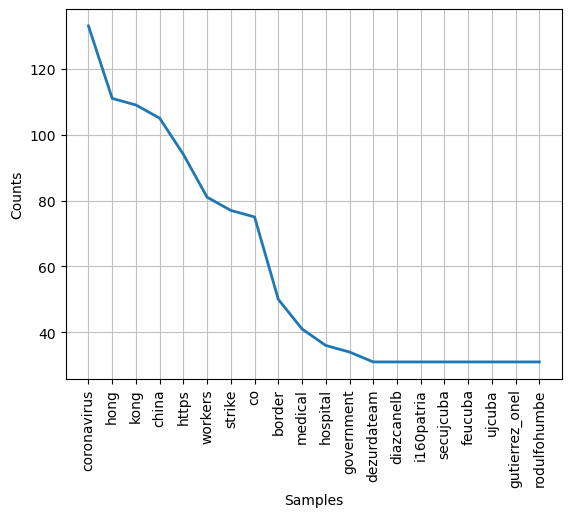

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [45]:
print(freq_dist)
print(freq_dist.most_common(20))
freq_dist.plot(20)

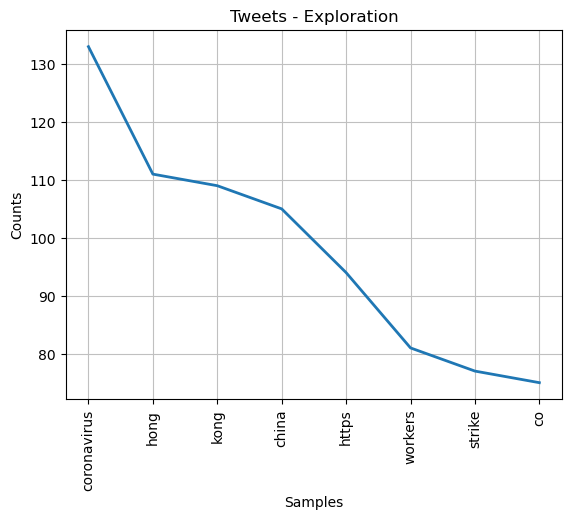

<AxesSubplot:title={'center':'Tweets - Exploration'}, xlabel='Samples', ylabel='Counts'>

In [46]:
# Plot of frequently occurring words in the weekly tweets

plt.title('Tweets - Exploration')    
freq_dist.plot(8)